In [39]:
#importing libraries

import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupKFold
from sklearn.metrics import accuracy_score
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.linear_model import LinearRegression

import seaborn as sns



C:\Users\Dr.Farhan\AppData\Local\Temp\ipykernel_18300\1131378881.py:11: DtypeWarning: Columns (37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('D:/CE888/raw data/raw_data/Participant00' + str(0) + str(i) + '.tsv',sep='\t')
C:\Users\Dr.Farhan\AppData\Local\Temp\ipykernel_18300\1131378881.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].str.replace(',', '.').astype(float)
C:\Users\Dr.Farhan\AppData\Local\Temp\ipykernel_18300\1131378881.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append({'Participant no': i, 'Recording no': j,'Pupil diameter succades': one, 'Pu

In [41]:
# building our outout variable

output1=pd.read_csv('C:/Users/Dr.Farhan/Desktop/CE888/data/Questionnaire_datasetIB.csv',sep = ",", encoding='latin')
output2=pd.read_csv('C:/Users/Dr.Farhan/Desktop/CE888/data/Questionnaire_datasetIA.csv',sep = ",", encoding='latin')

final_score = output1['Total Score original'] + output2['Total Score original']

In [ ]:
# setting a dataframe for just control data

df_new = set_dataframe(1,60,2)

In [38]:
# is is our function to prepare dataframe according to our requirement


def set_dataframe(x,y,z):

    d = {'Participant no': [], 'Recording no': [], 'Pupil diameter succades': [], 'Pupil diameter for fixations': [],'Max Pupil diameter for succades': [],'Max Pupil diameter for fixations': [],'Succade duration': [],'Fixation duration': [], 'Empythy score': []}

    df_new = pd.DataFrame(data = d)


    for i in range(x,y,z):
    
        if i <= 9:
            data=pd.read_csv('D:/CE888/raw data/raw_data/Participant00' + str(0) + str(i) + '.tsv',sep='\t')
       
        else:
            data=pd.read_csv('D:/CE888/raw data/raw_data/Participant00' +  str(i) + '.tsv',sep='\t')
        
        data = data[['Recording name','Pupil diameter left','Pupil diameter right','Gaze event duration','Eye movement type']]

        last_row = data.iloc[-1]
    
        s1=re.sub("Recording","",last_row['Recording name'])
        s1 = int(s1)

        data_store = data

        for j in range(1, s1+1):
    
            data = data_store

            def fix_commas(data):
                        for col in data.select_dtypes(include='object'):
                
                            data[col] = data[col].str.replace(',', '.').astype(float)
                        return data
        
            data2 = data[["Pupil diameter left","Pupil diameter right"]]

            data2 = fix_commas(data2)

            data[["Pupil diameter left","Pupil diameter right"]] = data2[["Pupil diameter left","Pupil diameter right"]]

            #data.fillna(data.mean(numeric_only=True).round(1), inplace=True)
            data.bfill(axis ='rows')

            data2 = data["Eye movement type"]

            data["Eye movement type"] = data["Eye movement type"].replace(np.nan, 'EyesNotFound', regex=True)

            data[["Pupil diameter left","Pupil diameter right","Gaze event duration"]] = data[["Pupil diameter left","Pupil diameter right","Gaze event duration"]].astype(float)

            data = data[data['Recording name']=="Recording"+str(j)+""]

            data_succade = data[data['Eye movement type']=="Saccade"]

            data_fix = data[data['Eye movement type']=="Fixation"]

            sd = data_succade['Gaze event duration'].mean()

            sf = data_fix['Gaze event duration'].mean()

            one = data_succade['Pupil diameter left'].mean()

            two = data_succade['Pupil diameter left'].max()

            three = data_fix['Pupil diameter left'].mean()

            four = data_fix['Pupil diameter left'].max()

            df_new = df_new.append({'Participant no': i, 'Recording no': j,'Pupil diameter succades': one, 'Pupil diameter for fixations': three,'Max Pupil diameter for succades': two, 'Max Pupil diameter for fixations': four,'Succade duration': sd, 'Fixation duration': sf, 'Empythy score': final_score[i-1]}, ignore_index=True)

    
    return df_new

In [40]:
df_new

,Participant no,Recording no,Pupil diameter succades,Pupil diameter for fixations,Max Pupil diameter for succades,Max Pupil diameter for fixations,Succade duration,Fixation duration,Empythy score
0,1.0,1.0,3.120145,3.110965,3.70,3.58,39.331797,279.965073,217.0
1,1.0,2.0,3.077405,3.065811,3.80,3.75,43.717839,241.645003,217.0
2,1.0,3.0,3.091644,3.081271,3.48,3.45,43.411111,202.565597,217.0
3,1.0,4.0,3.062722,3.038860,3.70,3.70,43.663631,206.731060,217.0
4,1.0,5.0,3.068679,3.014598,3.68,3.54,46.127133,218.052768,217.0
5,1.0,6.0,2.996193,2.967092,4.68,4.60,44.839822,241.821860,217.0
6,1.0,7.0,2.987828,2.973051,3.88,3.85,49.771074,246.055661,217.0
7,1.0,8.0,3.005147,3.012793,3.87,3.87,46.973471,233.672398,217.0
8,3.0,1.0,3.120145,3.110965,3.70,3.58,39.331797,279.965073,179.0
9,3.0,2.0,3.077405,3.065811,3.80,3.75,43.717839,241.645003,179.0


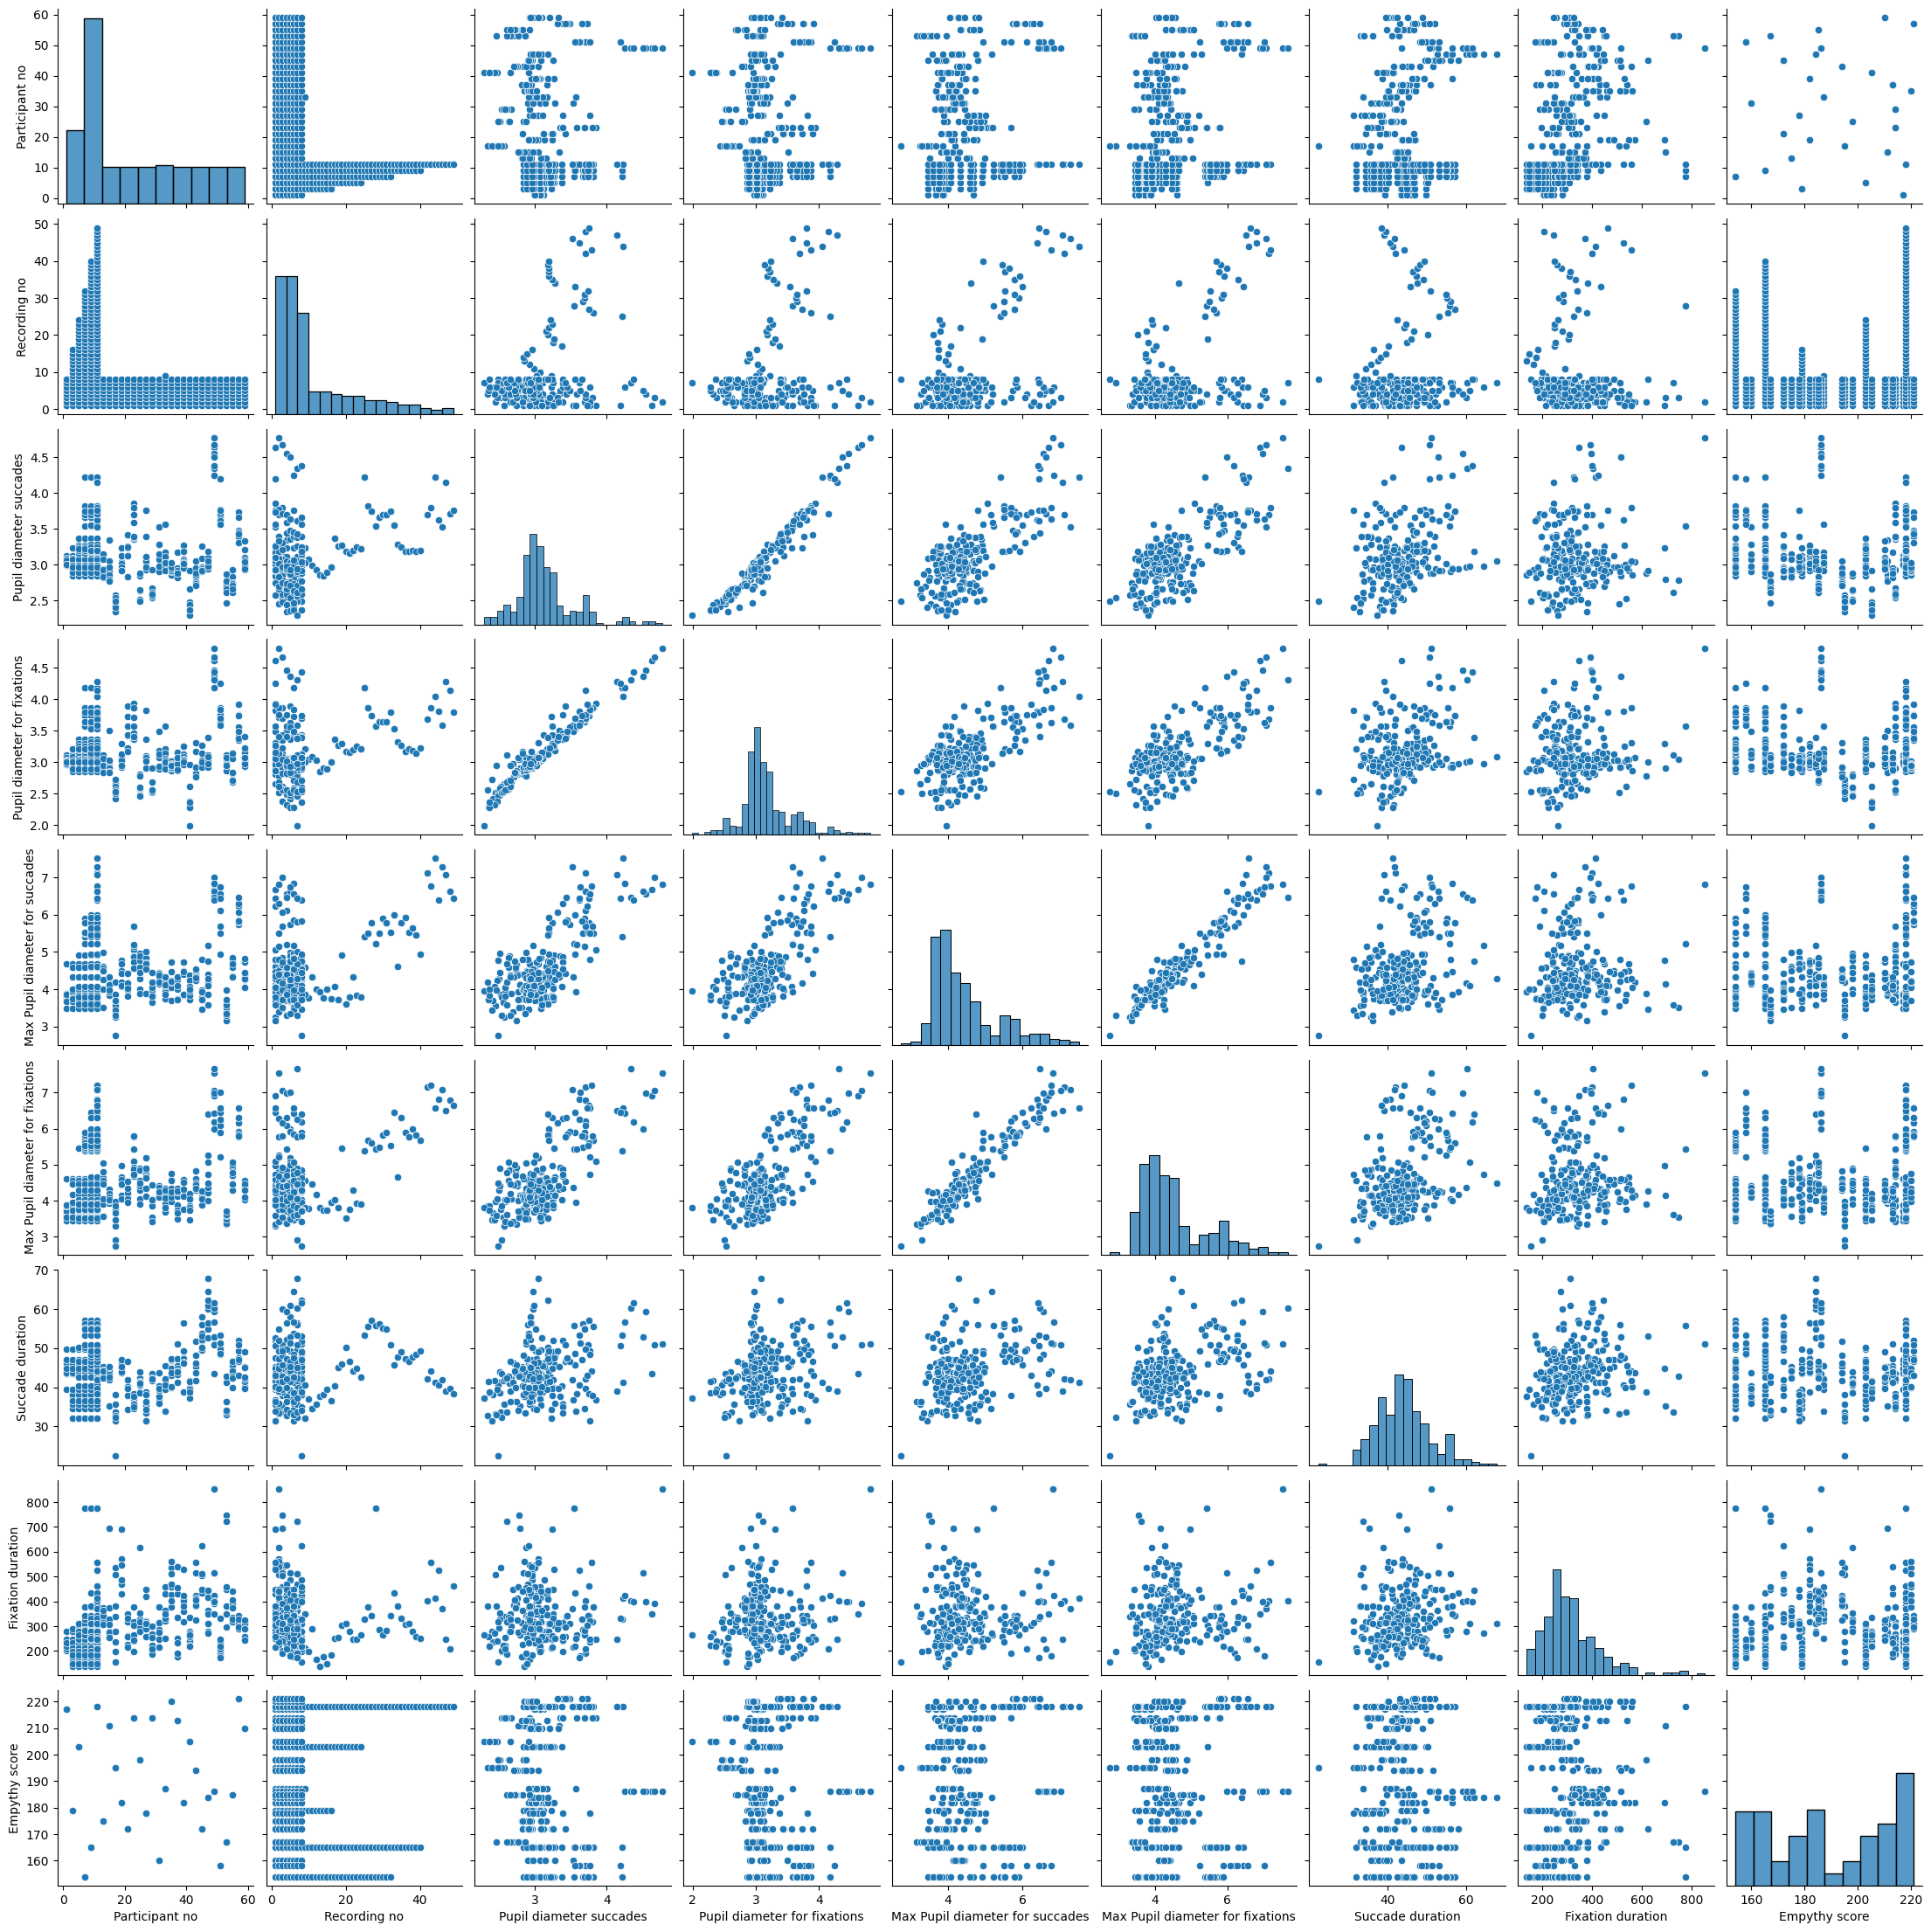

In [12]:
# we are ploting linear relationship between the input varibles and with output variable


import seaborn as sns

# drop Day and Month columns and rename Solar.R as Solar

sns.pairplot(df_new)

In [29]:
df_new = df_new.drop(columns=['Recording no','Pupil diameter succades','Max Pupil diameter for succades'])

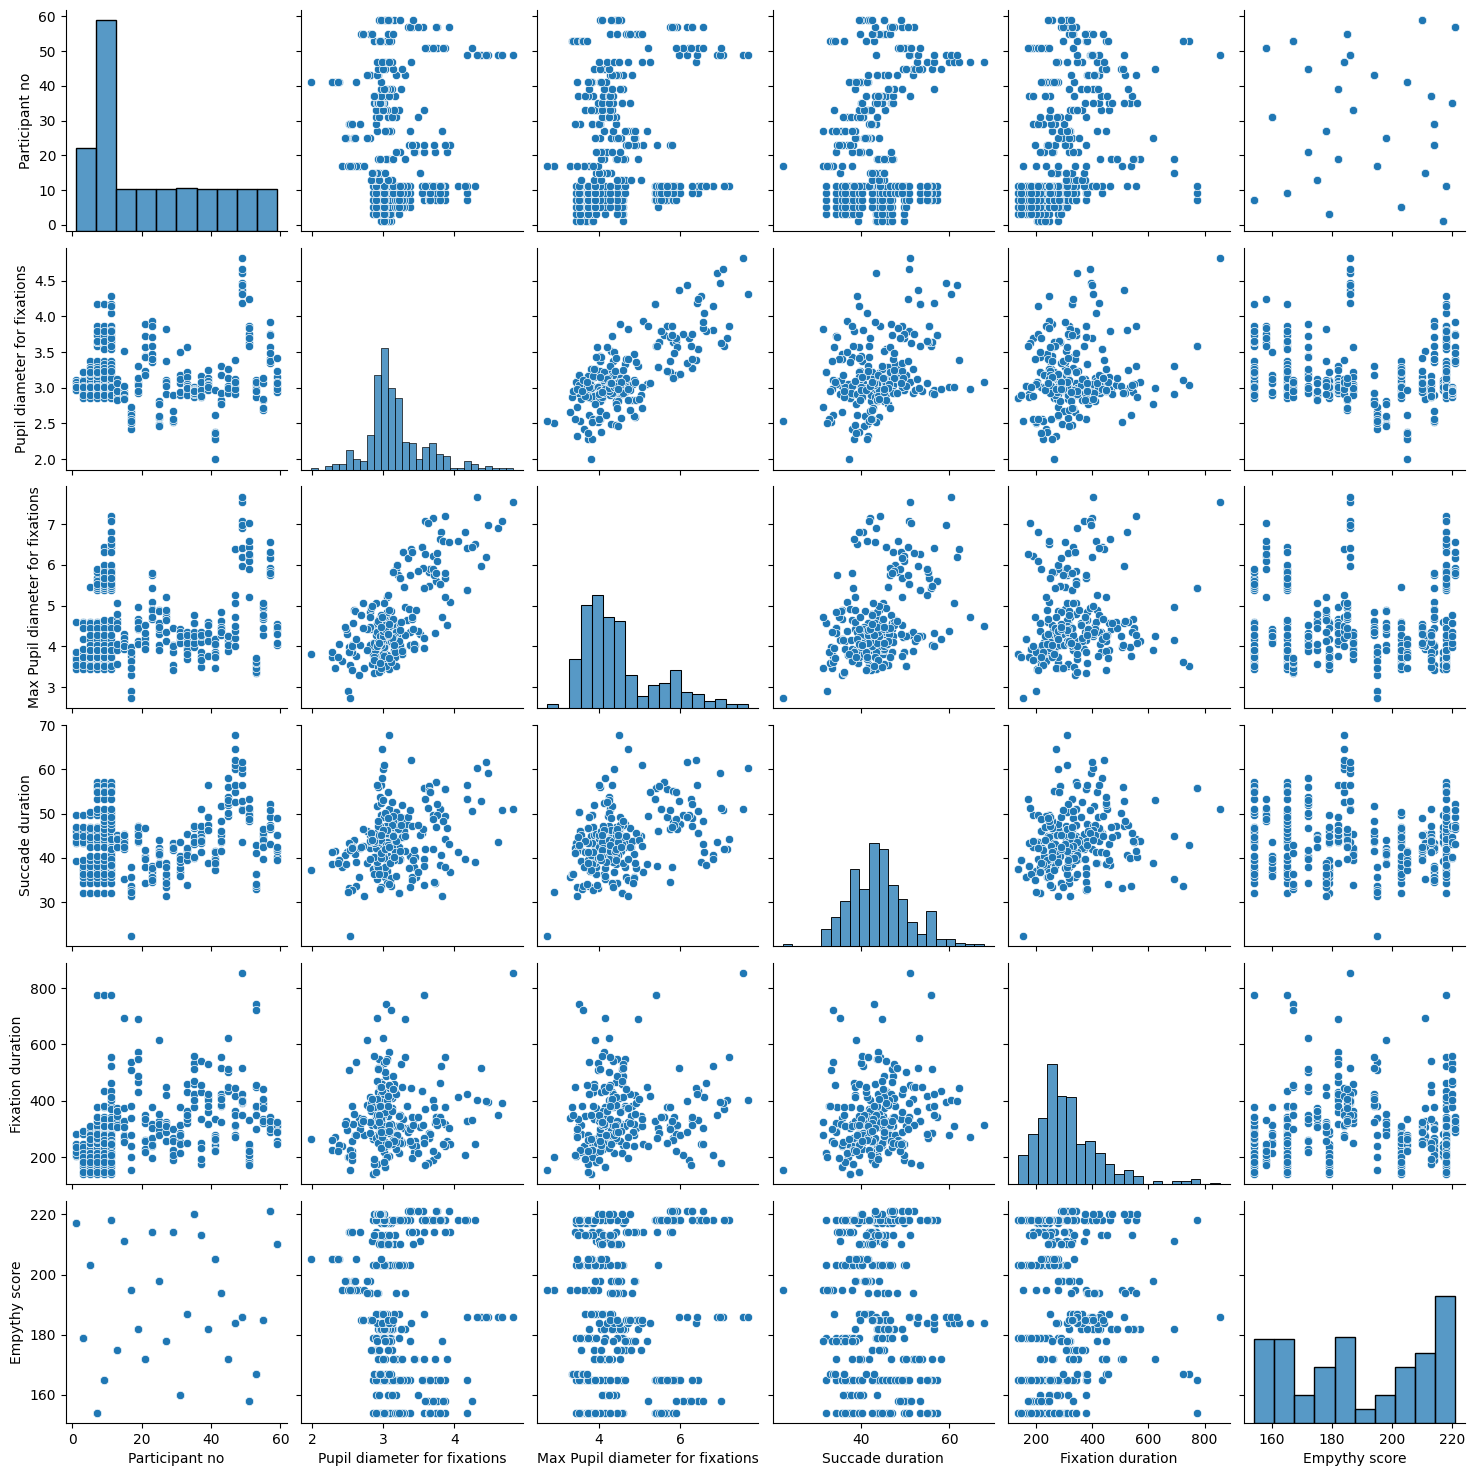

In [16]:
sns.pairplot(df_new)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt 

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.preprocessing import PolynomialFeatures

import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

import seaborn as sns 

In [31]:
df_new.drop(208,axis=0,inplace=True)

In [92]:
df_new = result

In [20]:
df_new = pd.DataFrame(data = d)

for i in range(2,61,2):
    
    if i <= 9:
        data=pd.read_csv('D:/CE888/raw data/raw_data/Participant00' + str(0) + str(i) + '.tsv',sep='\t')
       
    else:
        data=pd.read_csv('D:/CE888/raw data/raw_data/Participant00' +  str(i) + '.tsv',sep='\t')
        
    data = data[['Recording name','Pupil diameter left','Pupil diameter right','Gaze event duration','Eye movement type']]

    last_row = data.iloc[-1]
    
    s1=re.sub("Recording","",last_row['Recording name'])
    s1 = int(s1)

    data_store = data

    for j in range(1, s1+1):
    
        data = data_store

        def fix_commas(data):
                    for col in data.select_dtypes(include='object'):
                
                        data[col] = data[col].str.replace(',', '.').astype(float)
                    return data
        
        data2 = data[["Pupil diameter left","Pupil diameter right"]]

        data2 = fix_commas(data2)

        data[["Pupil diameter left","Pupil diameter right"]] = data2[["Pupil diameter left","Pupil diameter right"]]

        #data.fillna(data.mean(numeric_only=True).round(1), inplace=True)
        data.bfill(axis ='rows')

        data2 = data["Eye movement type"]

        data["Eye movement type"] = data["Eye movement type"].replace(np.nan, 'EyesNotFound', regex=True)

        data[["Pupil diameter left","Pupil diameter right","Gaze event duration"]] = data[["Pupil diameter left","Pupil diameter right","Gaze event duration"]].astype(float)

        data = data[data['Recording name']=="Recording"+str(j)+""]

        data_succade = data[data['Eye movement type']=="Saccade"]

        data_fix = data[data['Eye movement type']=="Fixation"]

        sd = data_succade['Gaze event duration'].mean()

        sf = data_fix['Gaze event duration'].mean()

        one = data_succade['Pupil diameter left'].mean()

        two = data_succade['Pupil diameter left'].max()

        three = data_fix['Pupil diameter left'].mean()

        four = data_fix['Pupil diameter left'].max()

        df_new = df_new.append({'Participant no': i, 'Recording no': j,'Pupil diameter succades': one, 'Pupil diameter for fixations': three,'Max Pupil diameter for succades': two, 'Max Pupil diameter for fixations': four,'Succade duration': sd, 'Fixation duration': sf, 'Empythy score': final_score[i-1]}, ignore_index=True)

    
df_new

C:\Users\Dr.Farhan\AppData\Local\Temp\ipykernel_18300\1513058955.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].str.replace(',', '.').astype(float)
C:\Users\Dr.Farhan\AppData\Local\Temp\ipykernel_18300\1513058955.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append({'Participant no': i, 'Recording no': j,'Pupil diameter succades': one, 'Pupil diameter for fixations': three,'Max Pupil diameter for succades': two, 'Max Pupil diameter for fixations': four,'Succade duration': sd, 'Fixation duration': sf, 'Empythy score': final_score[i-1]}, ignore_index=True)
C:\Users\Dr.Farhan\AppData\Local\Temp\ipykernel_18300\1

,Participant no,Recording no,Pupil diameter succades,Pupil diameter for fixations,Max Pupil diameter for succades,Max Pupil diameter for fixations,Succade duration,Fixation duration,Empythy score
0,2.0,1.0,3.190680,3.296570,4.40,5.30,39.862922,306.839547,205.0
1,2.0,2.0,2.974086,2.981972,3.83,3.80,40.188732,265.001601,205.0
2,2.0,3.0,3.095347,3.188000,3.91,4.00,36.443609,302.141603,205.0
3,2.0,4.0,3.172364,3.140560,3.85,4.05,39.404145,426.798122,205.0
4,2.0,5.0,3.184135,3.196268,4.12,4.03,37.533498,232.489877,205.0
5,4.0,1.0,3.190680,3.296570,4.40,5.30,39.862922,306.839547,191.0
6,4.0,2.0,2.974086,2.981972,3.83,3.80,40.188732,265.001601,191.0
7,4.0,3.0,3.095347,3.188000,3.91,4.00,36.443609,302.141603,191.0
8,4.0,4.0,3.172364,3.140560,3.85,4.05,39.404145,426.798122,191.0
9,4.0,5.0,3.184135,3.196268,4.12,4.03,37.533498,232.489877,191.0


In [35]:
df_new = df_new.drop(columns=['Recording no','Pupil diameter succades','Max Pupil diameter for succades'])

array([[<AxesSubplot: title={'center': 'Participant no'}>,
        <AxesSubplot: title={'center': 'Pupil diameter for fixations'}>],
       [<AxesSubplot: title={'center': 'Max Pupil diameter for fixations'}>,
        <AxesSubplot: title={'center': 'Succade duration'}>],
       [<AxesSubplot: title={'center': 'Fixation duration'}>,
        <AxesSubplot: title={'center': 'Empythy score'}>]], dtype=object)

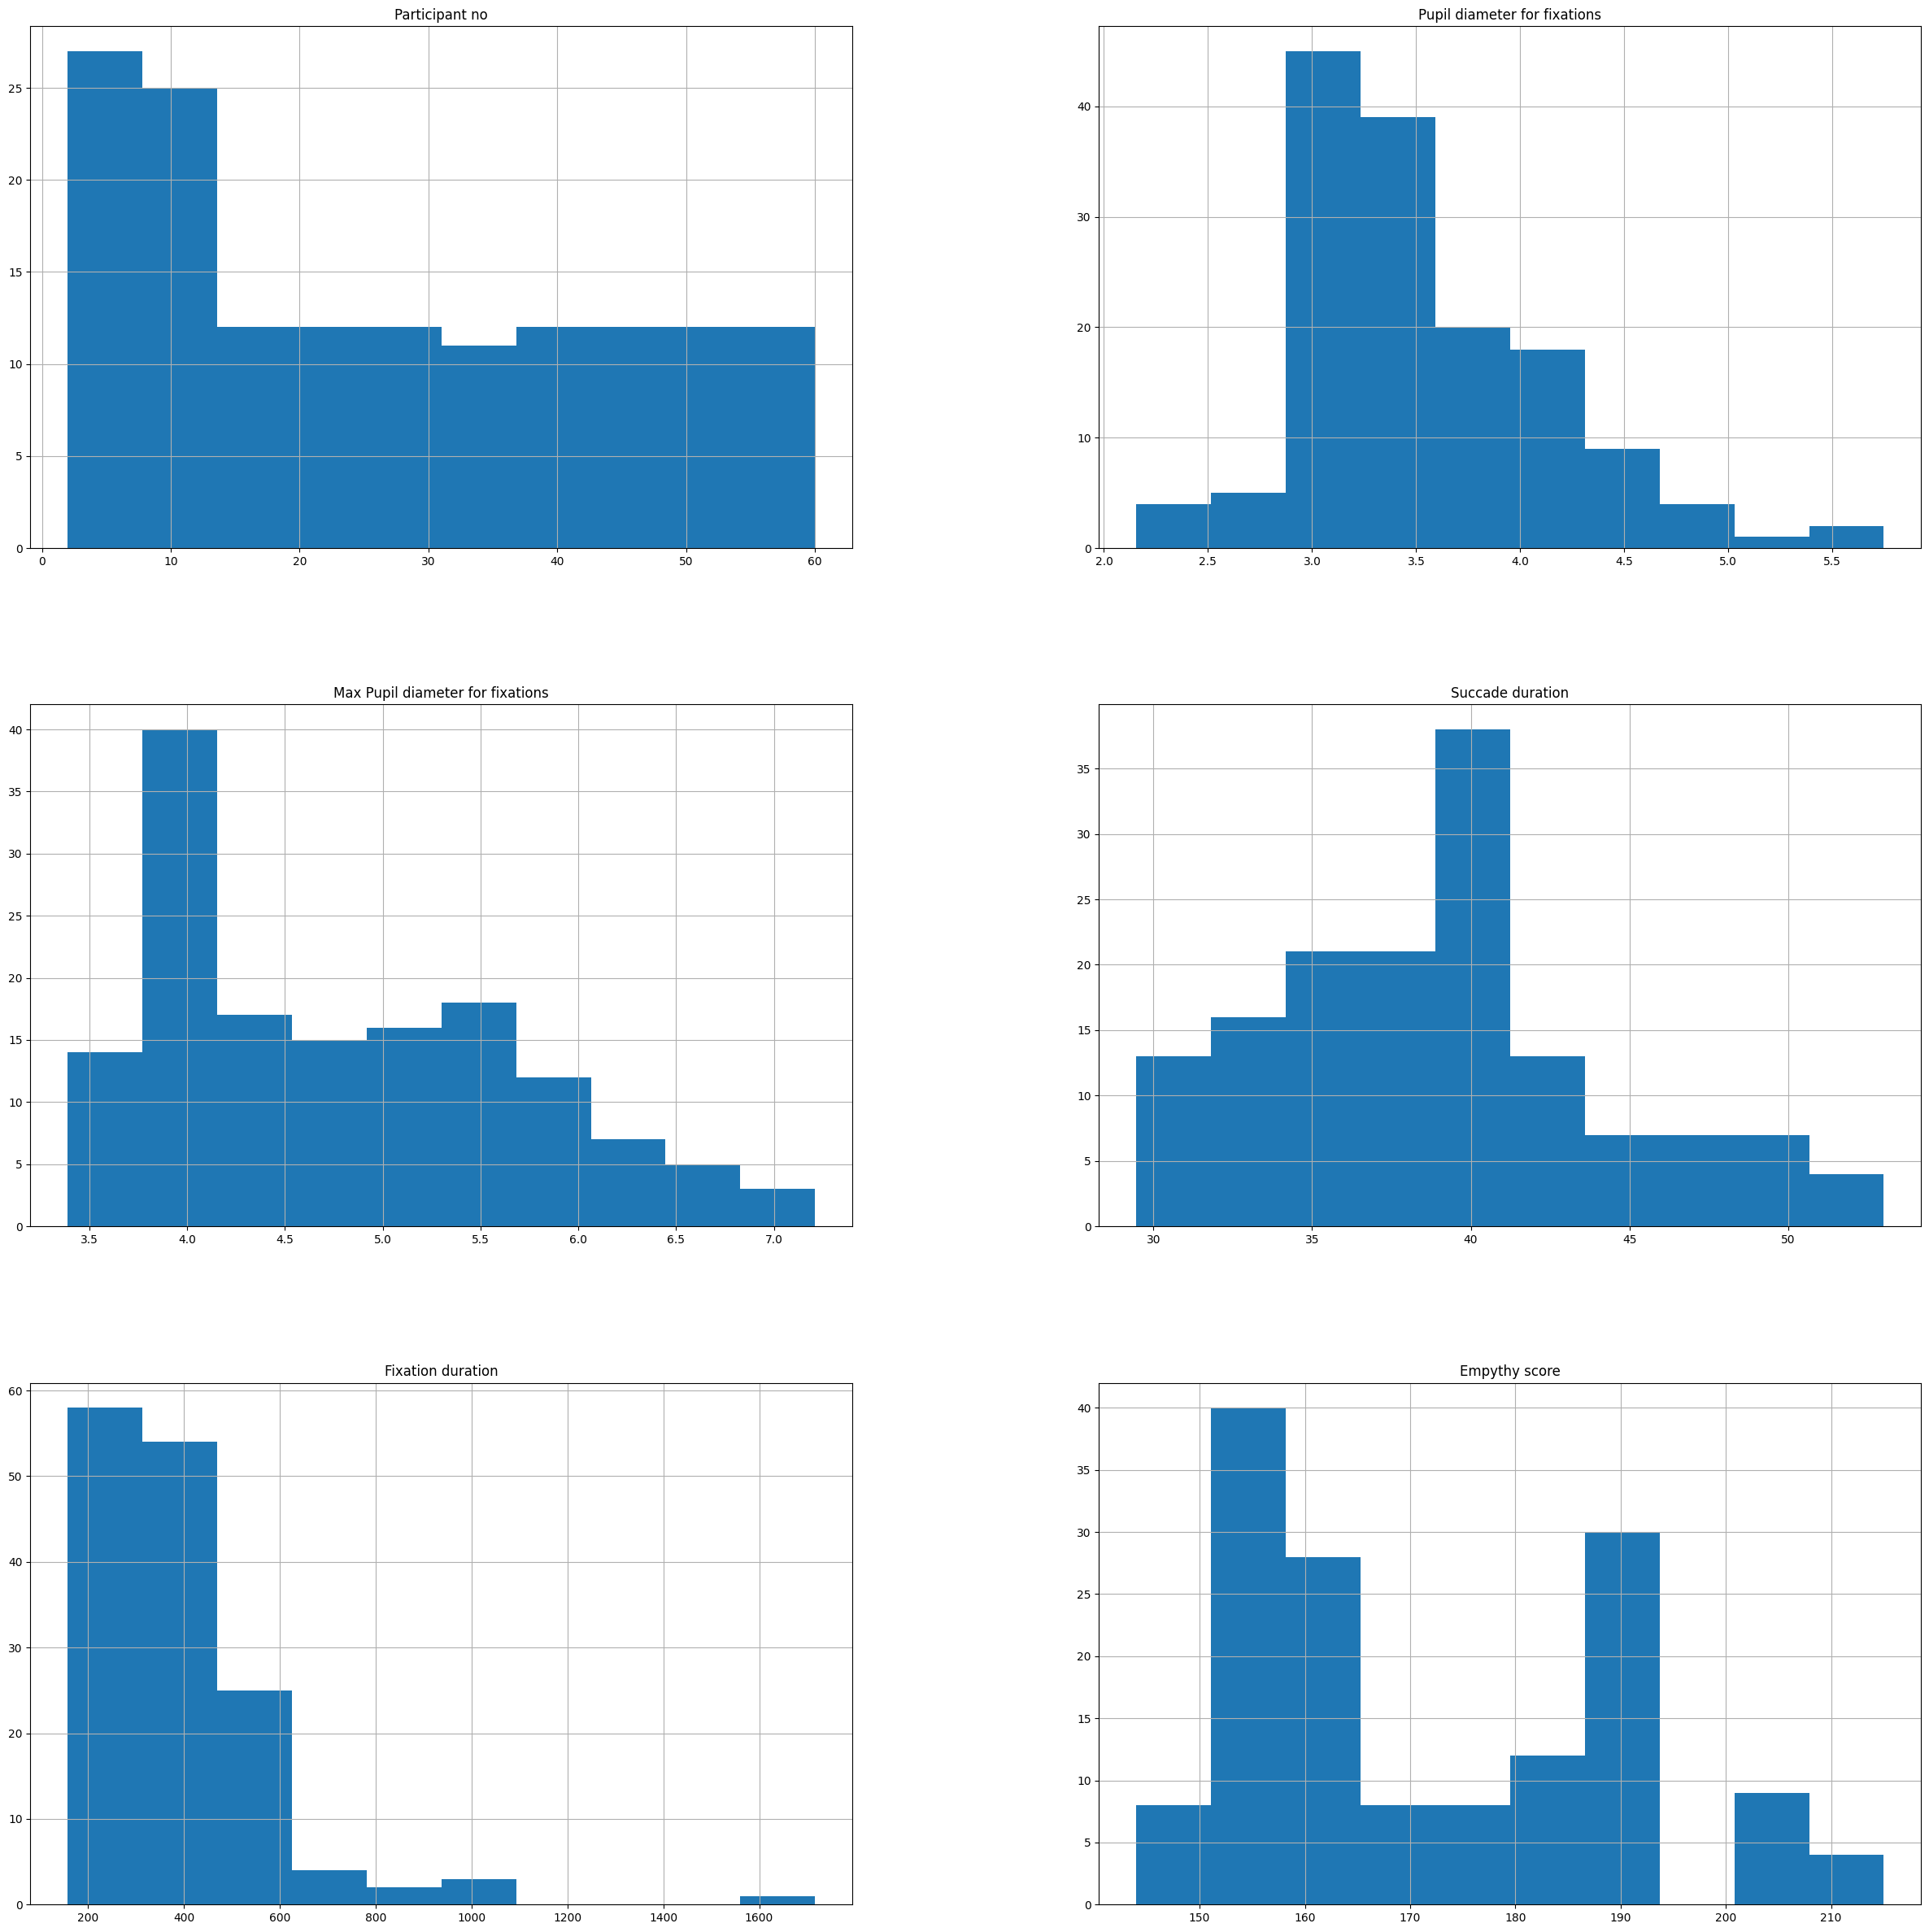

In [65]:
# we are seeing the data distributions in our selected input variables. 


df_new.hist(figsize=(30,30))

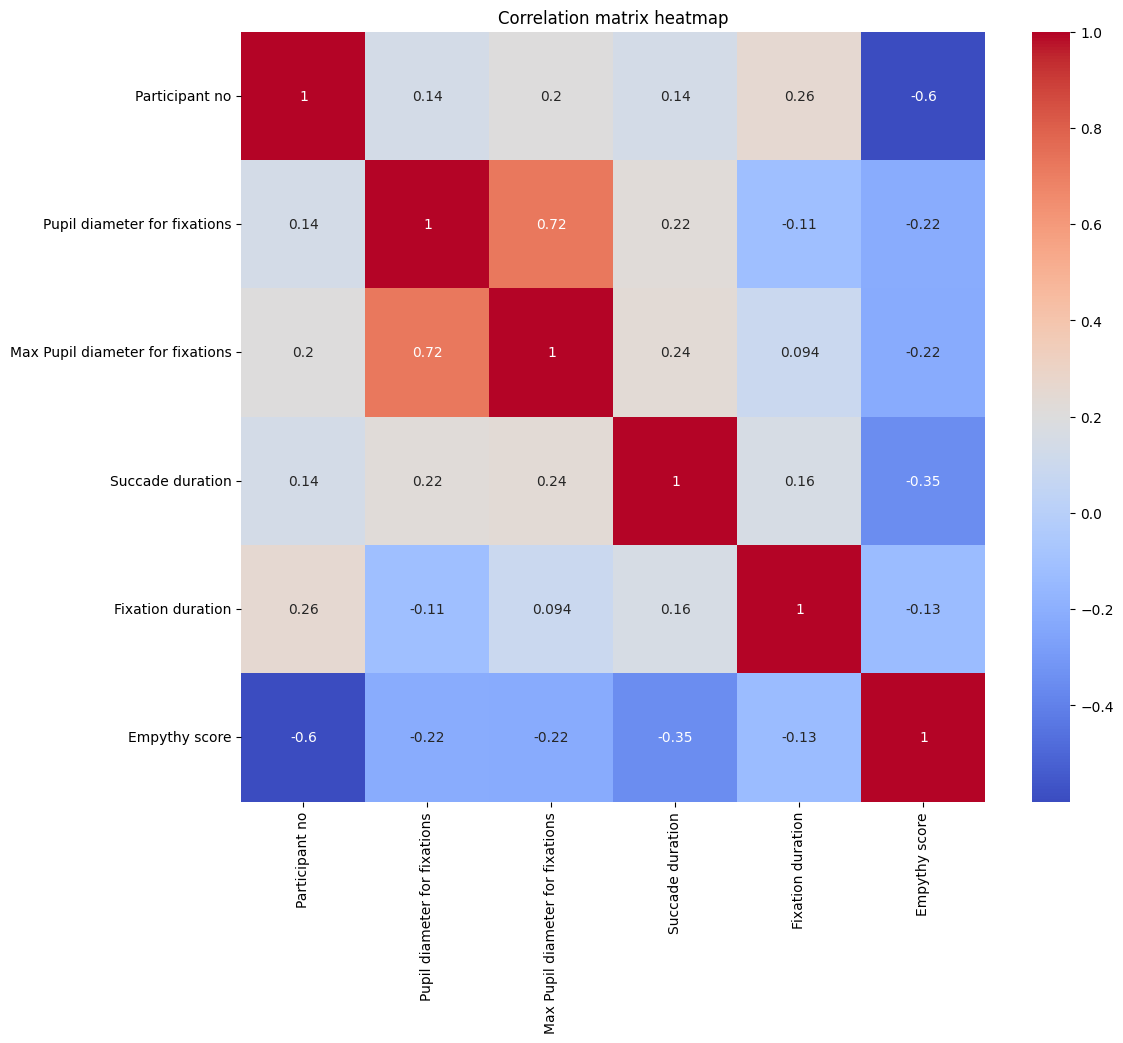

In [74]:
# correlation matrix of our first selected combination of input features and output 

corr = df_new.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation matrix heatmap')

plt.show()

In [2]:
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupKFold
from sklearn.metrics import accuracy_score
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.linear_model import LinearRegression

output1=pd.read_csv('C:/Users/Dr.Farhan/Desktop/CE888/data/Questionnaire_datasetIB.csv',sep = ",", encoding='latin')
output2=pd.read_csv('C:/Users/Dr.Farhan/Desktop/CE888/data/Questionnaire_datasetIA.csv',sep = ",", encoding='latin')

final_score = output1['Total Score original'] + output2['Total Score original']

In [40]:
# trying some other combinationation of features to see the corelation if they suits more for further processing


d = {'Participant no': [], 'Recording no': [], 'Gaze point left Y': [], 'Fixation point Y': [],'Fixation point X': [],'Gaze point X': [],'Gaze point Y': [],'Gaze point left X': [], 'Empythy score': []}

df_new = pd.DataFrame(data = d)


for i in range(1,60,2):
    
    if i <= 9:
        data=pd.read_csv('D:/CE888/raw data/raw_data/Participant00' + str(0) + str(i) + '.tsv',sep='\t')
       
    else:
        data=pd.read_csv('D:/CE888/raw data/raw_data/Participant00' +  str(i) + '.tsv',sep='\t')
        
    data = data[['Recording name','Fixation point Y','Fixation point X','Gaze point X','Gaze point Y','Gaze point left X','Gaze point left Y']]

    last_row = data.iloc[-1]
    
    s1=re.sub("Recording","",last_row['Recording name'])
    s1 = int(s1)

    data_store = data

    for j in range(1, s1+1):
    
        data = data_store

        def fix_commas(data):
                    for col in data.select_dtypes(include='object'):
                
                        data[col] = data[col].str.replace(',', '.').astype(float)
                    return data
        
        #data2 = data[["Pupil diameter left","Pupil diameter right"]]

        #data2 = fix_commas(data2)

        #data[["","Pupil diameter right"]] = data2[["Pupil diameter left","Pupil diameter right"]]

        #data.fillna(data.mean(numeric_only=True).round(1), inplace=True)
        data.bfill(axis ='rows')
        #print(data)

        #data2 = data["Eye movement type"]

        #data["Eye movement type"] = data["Eye movement type"].replace(np.nan, 'EyesNotFound', regex=True)

        data[['Fixation point Y','Fixation point X','Gaze point X','Gaze point Y','Gaze point left X','Gaze point left Y']] = data[['Fixation point Y','Fixation point X','Gaze point X','Gaze point Y','Gaze point left X','Gaze point left Y']].astype(float)
        #result = data.apply(lambda iterator: ((iterator.max() - iterator)/(iterator.max() - iterator.min())).round(2))
        #data = result
        data = data[data['Recording name']=="Recording"+str(j)+""]

        #data_succade = data[data['Eye movement type']=="Saccade"]

        #data_fix = data[data['Eye movement type']=="Fixation"]

        sd = data['Fixation point Y'].mean()

        sf = data['Fixation point X'].mean()

        one = data['Gaze point X'].mean()

        two = data['Gaze point Y'].mean()

        three = data['Gaze point left X'].mean()

        four = data['Gaze point left Y'].max()

        df_new = df_new.append({'Participant no': i, 'Recording no': j,'Fixation point Y': sd, 'Fixation point X': sf,'Gaze point X': one, 'Gaze point Y': two,'Gaze point left X': three, 'Gaze point left Y': four, 'Empythy score': final_score[i-1]}, ignore_index=True)

    
df_new

C:\Users\Dr.Farhan\AppData\Local\Temp\ipykernel_7724\2585654376.py:9: DtypeWarning: Columns (37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('D:/CE888/raw data/raw_data/Participant00' + str(0) + str(i) + '.tsv',sep='\t')
C:\Users\Dr.Farhan\AppData\Local\Temp\ipykernel_7724\2585654376.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append({'Participant no': i, 'Recording no': j,'Fixation point Y': sd, 'Fixation point X': sf,'Gaze point X': one, 'Gaze point Y': two,'Gaze point left X': three, 'Gaze point left Y': four, 'Empythy score': final_score[i-1]}, ignore_index=True)
C:\Users\Dr.Farhan\AppData\Local\Temp\ipykernel_7724\2585654376.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append({'Participant no': i, 'Recordin

,Participant no,Recording no,Gaze point left Y,Fixation point Y,Fixation point X,Gaze point X,Gaze point Y,Gaze point left X,Empythy score
0,1.0,1.0,1874.0,249.330647,1080.994447,1049.856392,292.048991,1017.487252,217.0
1,1.0,2.0,1072.0,298.759330,970.809394,968.974302,326.545647,931.447189,217.0
2,1.0,3.0,1001.0,306.697027,943.471685,938.772830,332.352620,902.182866,217.0
3,1.0,4.0,1014.0,353.370136,960.405885,960.405696,381.053516,921.038114,217.0
4,1.0,5.0,1041.0,299.100757,981.224014,990.888712,336.680950,951.862654,217.0
5,1.0,6.0,871.0,247.386514,975.707558,961.846734,301.988458,925.621293,217.0
6,1.0,7.0,927.0,290.956323,923.007884,912.904573,322.473899,879.656607,217.0
7,1.0,8.0,973.0,247.670863,948.031931,961.325462,285.642094,925.657822,217.0
8,3.0,1.0,1874.0,249.330647,1080.994447,1049.856392,292.048991,1017.487252,179.0
9,3.0,2.0,1072.0,298.759330,970.809394,968.974302,326.545647,931.447189,179.0


In [7]:
import seaborn as sns 
from matplotlib import pyplot as plt 

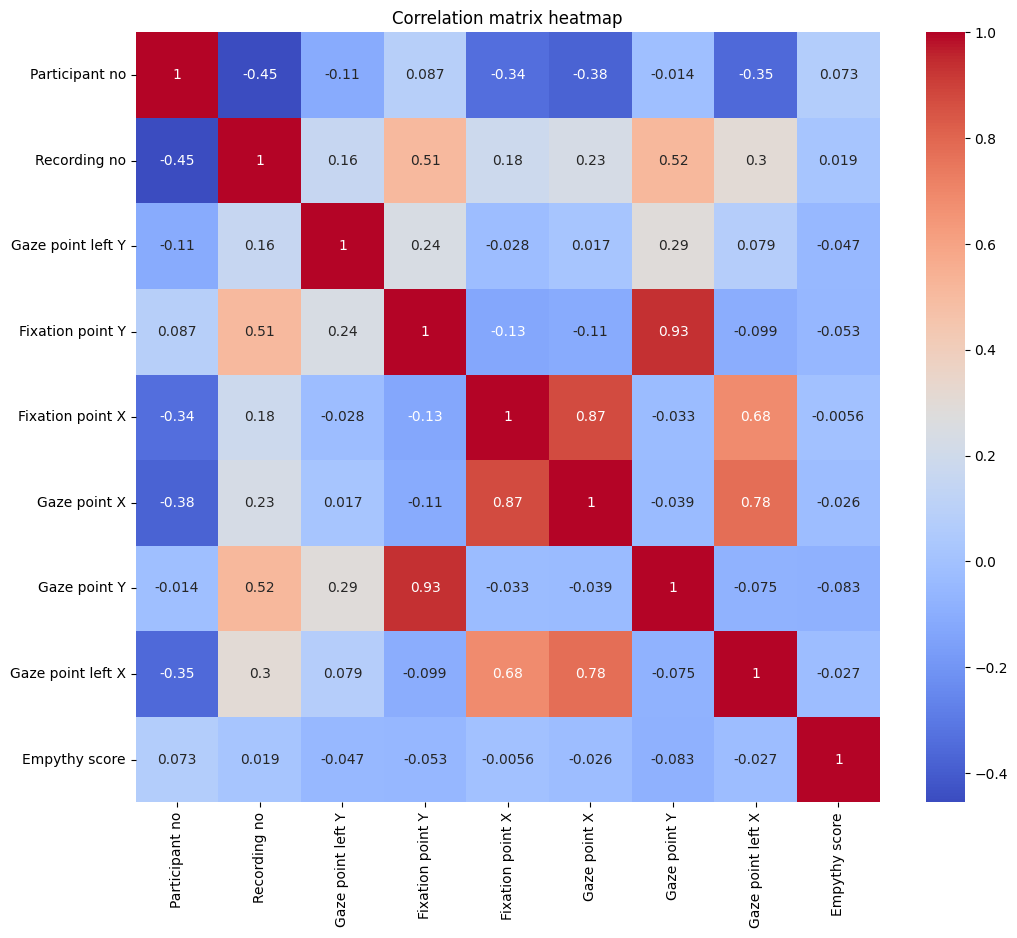

In [44]:
# correlation matrix of this new combintion of features to check if they are more good

corr = result.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation matrix heatmap')

plt.show()

In [10]:
data=pd.read_csv('D:/CE888/raw data/raw_data/Participant0001'+'.tsv',sep='\t')

C:\Users\Dr.Farhan\AppData\Local\Temp\ipykernel_7724\2199537891.py:1: DtypeWarning: Columns (37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('D:/CE888/raw data/raw_data/Participant0001'+'.tsv',sep='\t')


In [36]:
data.head(50)

,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,Recording start time,Recording start time UTC,Recording duration,Timeline name,Recording Fixation filter name,Recording software version,Recording resolution height,Recording resolution width,Recording monitor latency,Average calibration accuracy (mm),Average calibration precision SD (mm),Average calibration precision RMS (mm),Average calibration accuracy (degrees),Average calibration precision SD (degrees),Average calibration precision RMS (degrees),Average calibration accuracy (pixels),Average calibration precision SD (pixels),Average calibration precision RMS (pixels),Average validation accuracy (mm),Average validation precision SD (mm),Average validation precision RMS (mm),Average validation accuracy (degrees),Average validation precision SD (degrees),Average validation precision RMS (degrees),Average validation accuracy (pixels),Average validation precision SD (pixels),Average validation precision RMS (pixels),Eyetracker timestamp,Event,Event value,Gaze point X,Gaze point Y,Gaze point left X,Gaze point left Y,Gaze point right X,Gaze point right Y,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,Gaze direction right Y,Gaze direction right Z,Pupil diameter left,Pupil diameter right,Validity left,Validity right,Eye position left X (DACSmm),Eye position left Y (DACSmm),Eye position left Z (DACSmm),Eye position right X (DACSmm),Eye position right Y (DACSmm),Eye position right Z (DACSmm),Gaze point left X (DACSmm),Gaze point left Y (DACSmm),Gaze point right X (DACSmm),Gaze point right Y (DACSmm),Gaze point X (MCSnorm),Gaze point Y (MCSnorm),Gaze point left X (MCSnorm),Gaze point left Y (MCSnorm),Gaze point right X (MCSnorm),Gaze point right Y (MCSnorm),Presented Stimulus name,Presented Media name,Presented Media width,Presented Media height,Presented Media position X (DACSpx),Presented Media position Y (DACSpx),Original Media width,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Client area position X (DACSpx),Client area position Y (DACSpx),Viewport position X,Viewport position Y,Viewport width,Viewport height,Full page width,Full page height,Mouse position X,Mouse position Y
0,0,488673071,NaN,Test group experiment,24.09.2020,Participant0001,Recording1,24.09.2020,24.09.2020,15:17:34.920,13:17:34.920,83579,Timeline1,Tobii I-VT (Fixation),1.145.28180,1080,1920,"10,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RecordingStart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,94804,488767875,Eye Tracker,Test group experiment,24.09.2020,Participant0001,Recording1,24.09.2020,24.09.2020,15:17:34.920,13:17:34.920,83579,Timeline1,Tobii I-VT (Fixation),1.145.28180,1080,1920,"10,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,486549983.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Invalid,Invalid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EyesNotFound,17.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,103121,488776192,Eye Tracker,Test group experiment,24.09.2020,Participant0001,Recording1,24.09.2020,24.09.2020,15:17:34.920,13:17:34.920,83579,Timeline1,Tobii I-VT (Fixation),1.145.28180,1080,1920,"10,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,486558300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Invalid,Invalid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EyesNotFound,17.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [91]:
result = df_new.apply(lambda iterator: ((iterator.max() - iterator)/(iterator.max() - iterator.min())).round(2))

In [32]:
data2 = df_new[["Pupil diameter for fixations","Max Pupil diameter for fixations","Succade duration","Fixation duration","Empythy score"]]

In [33]:
result = data2.apply(lambda iterator: ((iterator.max() - iterator)/(iterator.max() - iterator.min())).round(2))

In [34]:
result

,Pupil diameter for fixations,Max Pupil diameter for fixations,Succade duration,Fixation duration,Empythy score
0,0.70,0.83,0.63,0.91,0.05
1,0.71,0.80,0.53,0.93,0.05
2,0.71,0.86,0.54,0.96,0.05
3,0.72,0.81,0.53,0.96,0.05
4,0.73,0.84,0.48,0.95,0.05
5,0.74,0.62,0.50,0.93,0.05
6,0.74,0.77,0.40,0.93,0.05
7,0.73,0.77,0.46,0.94,0.05
8,0.65,0.48,0.61,0.89,0.21
9,0.74,0.78,0.61,0.92,0.21


In [35]:
df_new[["Pupil diameter for fixations","Max Pupil diameter for fixations","Succade duration","Fixation duration","Empythy score"]] = result[["Pupil diameter for fixations","Max Pupil diameter for fixations","Succade duration","Fixation duration","Empythy score"]]

In [36]:
df_new

,Participant no,Pupil diameter for fixations,Max Pupil diameter for fixations,Succade duration,Fixation duration,Empythy score
0,1.0,0.70,0.83,0.63,0.91,0.05
1,1.0,0.71,0.80,0.53,0.93,0.05
2,1.0,0.71,0.86,0.54,0.96,0.05
3,1.0,0.72,0.81,0.53,0.96,0.05
4,1.0,0.73,0.84,0.48,0.95,0.05
5,1.0,0.74,0.62,0.50,0.93,0.05
6,1.0,0.74,0.77,0.40,0.93,0.05
7,1.0,0.73,0.77,0.46,0.94,0.05
8,2.0,0.65,0.48,0.61,0.89,0.21
9,2.0,0.74,0.78,0.61,0.92,0.21
